## translate M1S1 in radial direction (along +y of M1S1 coordinate system)

calculate the projection to surface normal and compare to results from Christoph

In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.jet()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<Figure size 640x480 with 0 Axes>

## Some parameters

In [2]:
r_S1_center_in_S0 = 8.710 #distance of S1 to optical axis in m
diameter_of_CA = 8.365 #CA diamter in m
radius_of_curvature = 36.000 #radius of curvature in m
conic = -0.998286
radius_of_CA = diameter_of_CA/2.0
y_S1_center = r_S1_center_in_S0
x_S1_center = 0

## Load Christoph's mat file

We will use same x,y nodes as Christoph, to faciliate the comparison

In [4]:
import scipy.io
mat2 = scipy.io.loadmat('Bo2.mat')

In [5]:
mat2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'elongations', 'inputHP', 'normalDisp', 'x', 'y', 'z'])

In [7]:
x=np.array(mat2['x'])
y=np.array(mat2['y'])
d=np.array(mat2['normalDisp'])

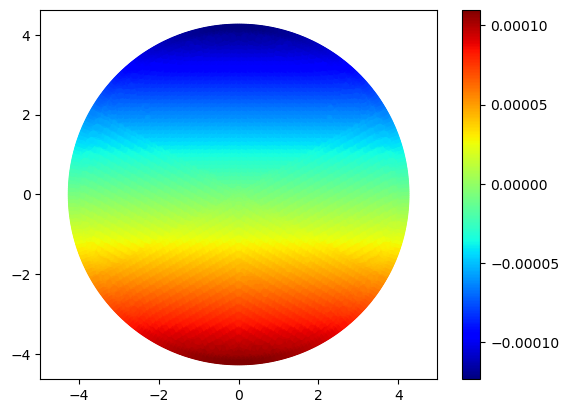

In [8]:
plt.scatter(x,y,10,c=d)
plt.axis('equal')
plt.colorbar();

## Get everything to M1S0 Coordinate System (so we can use the equation for ideal surface)

<img src="CSYS.jpeg" alt="isolated" width="500"/>

In [9]:
def surfFunc(r2):
    return r2/(radius_of_curvature+np.sqrt(radius_of_curvature**2-(1+conic)*r2))
x_in_parent = x
y_in_parent = y+r_S1_center_in_S0
r2_in_parent = x_in_parent**2+y_in_parent**2
z = surfFunc(r2_in_parent)

#for S1 center
x0 = x_S1_center
y0 = y_S1_center
r2_0 = x0**2+y0**2
z0 = surfFunc(r2_0)

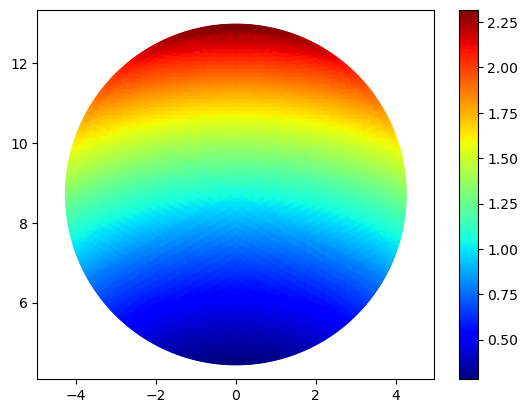

In [10]:
plt.scatter(x_in_parent,y_in_parent, 10, c=z)
plt.axis('equal')
plt.colorbar();

### Use the derivatives on the surface to get the surface normal unit vectors

In [11]:
e = 1e-6
zx = surfFunc((x_in_parent+e)**2+y_in_parent**2)
ux1=-np.sin(np.arctan((zx - z)/e))
zy = surfFunc(x_in_parent**2+(y_in_parent+e)**2)
uy1=-np.sin(np.arctan((zy - z)/e))
uz1=np.sqrt(1-ux1*ux1-uy1*uy1)
ux = ux1
uy = uy1
uz = uz1

#The below can be a good sanity check (which helps confirm we are not getting the signs confused)
if 0:
    #get surface normal vectors by drawing a arrow from a node to the center of curvature 
    #(OSS coordinate=(0,0,radius_of_curvature))
    ux = 0-x_in_parent
    uy = 0-y_in_parent
    uz = radius_of_curvature-z
    ur = np.sqrt(ux**2+uy**2+uz**2)
    ux /= ur
    uy /= ur
    uz /= ur

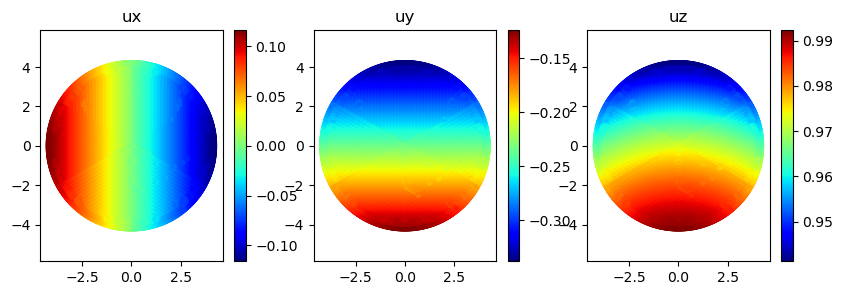

In [21]:
fig, ax = plt.subplots(1,3, figsize=(10,3))
img = ax[0].scatter(x,y,10, c=ux)
ax[0].axis('equal')
ax[0].set_title('ux')
fig.colorbar(img, ax=ax[0]);

img = ax[1].scatter(x,y,10, c=uy)
ax[1].axis('equal')
ax[1].set_title('uy')
fig.colorbar(img, ax=ax[1]);

img = ax[2].scatter(x,y,10, c=uz)
ax[2].axis('equal')
ax[2].set_title('uz')
fig.colorbar(img, ax=ax[2]);

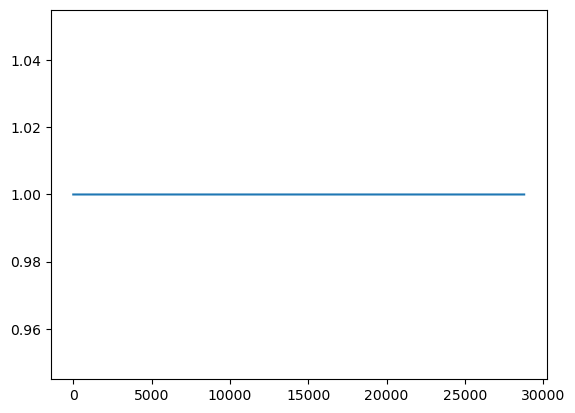

In [22]:
#verify that these are unit vectors
plt.plot(np.sqrt(ux**2+uy**2+uz**2))

## Calculate the displacement vectors

#### Radial shift of 1mm (we shift this along y-axis of M1-S1; the angle between x/y plane of M1-S1 and x/y plane of M1-S7 is 13.60 deg)

The angle between M1S1 back plate and x/y plane of M1-S7 is 13.52 deg.

### same displacement vector for every node (so we only calculate this for S1 center!!!)

In [30]:
tt = 1e-3 #shift of 1mm
realTheta = np.rad2deg(np.arctan((surfFunc(x0**2+(y0+e)**2)-z0)/e))
print(realTheta, ' vs 13.601685 #theta_M1, see GMT-REF-00189, Sec 3.8')
#realTheta = 13.522 #theta_B, see GMT-REF-00189, Sec 3.8 #if the radial shift is along the back surface
print('angle used by Christoph (Slack communication) = ', np.rad2deg(np.arccos(0.971954084911214)))

13.601685287856892  vs 13.601685 #theta_M1, see GMT-REF-00189, Sec 3.8
angle used by Christoph (Slack communication) =  13.601685000033754


In [27]:
tx = 0
ty = tt*np.cos(np.radians(realTheta))
tz = tt*np.sin(np.radians(realTheta))

In [28]:
if 0:
    #if we draw a triangle like below, the hypotenuse won't be exactly == radius_of_curvature
    cost = (radius_of_curvature - z0)/radius_of_curvature #cos(theta)
    sint = y0/radius_of_curvature  #sin(theta)
    tx = 0
    ty = tt*cost
    tz = tt*sint
    print(np.sqrt(cost**2+sint**2), cost, sint) #yes, !!!same displacement vector for every node

In [31]:
tn = tx*ux+ty*uy+tz*uz #inner product

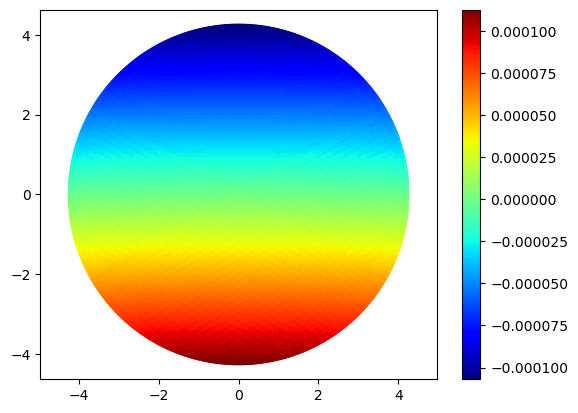

In [32]:
plt.scatter(x,y, 10, c=tn)
plt.axis('equal')
plt.colorbar();

## Compare to Christoph's surface normal displacements

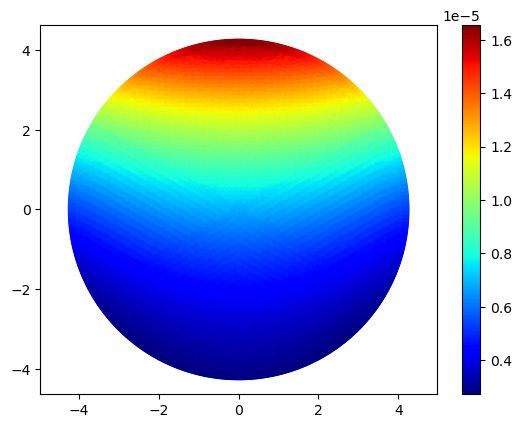

In [33]:
plt.scatter(x,y, 10, c=tn-d)
plt.axis('equal')
plt.colorbar();

In [34]:
np.max(abs(tn-d))

1.6561408199113596e-05